In [25]:
import numpy as np
from scipy.sparse import csr_matrix

In [26]:
N = 250
d = 80
k = 10
mu, sigma = 0, 10
X = np.random.normal(mu, sigma, (d,N))


In [27]:
b_star = np.asarray([0]*N)

In [28]:
w= [10]*5
w.extend([-10]*5)
w.extend([0]*(d-10))
w_star = np.asarray(w)

In [29]:
noise = np.random.normal(mu, sigma, (N))

In [30]:
w_star = w_star.reshape(d,1)
noise = noise.reshape(N,1)

In [31]:
y = np.matmul(X.T,w_star) + noise

In [32]:
y.shape

(250, 1)

In [33]:
#Calculate ak in A
A = np.zeros((d, 1))
T = np.matmul(X, X.T)
for i in range(d):
    A[i, 0] = 2*T[i,i]

In [34]:
def objective(w, r, lambd, d):
    sum_w = 0
    for i in range(d):
        sum_w += abs(w[i,0])
    return np.dot(r,r.T) + lambd*sum_w


In [35]:
def initLambda(X, Y, N):
    YNorm = Y - float(Y.sum())/N
    Z = abs(np.matmul(X,YNorm))
    re =  2 * (Z.max())
    print (re)
    return re


In [36]:
# YNorm = y - float(y.sum())/N

# np.matmul(X,YNorm)

In [45]:
lamba = 1

lamba = initLambda(X, y, N)

delta = 0.01

precision = []
recall = []
lambas = []

for i in range(10):
    print lamba
    b = np.zeros((1,N))
    w = np.ones((d,1))
    c = np.zeros((d,1))


    print("iteration: ", i+1)
    print("Lambda is :", lamba)
    
    converged = False
    previous = 0 
    i = 0
    while(not converged):
        R = y.T - np.matmul(w.T, X) - b
        b_new = np.asarray([(R + b).sum()/N]*N)
        R = R + b - b_new
        b = b_new
        w_new = np.zeros((d,1))
        for k in range(d):
            c[k,0] = 2*np.dot(R + w[k,0]*X[k], X[k])
            if(c[k,0] < -1*lamba):
                w_new[k,0] = (c[k,0] + lamba)/A[k,0]
            elif(c[k,0] > lamba):
                w_new[k,0] = (c[k,0] - lamba)/A[k,0]
            else:
                w_new[k,0] = 0
            R = R + w[k,0]*X[k] - w_new[k,0]*X[k]
        w = w_new
        print("Objective function value: ", i, " ", objective(w, R, lamba, d))
        i += 1
        newObjective = objective(w, R, lamba, d)
        if (abs(newObjective[0,0] - previous)) < delta:
            break
        else:
            previous = newObjective[0,0]

    
    print (w)
    if np.count_nonzero(w) == 0:
        lamba/=2
        lambas.append(lamba)
        recall.append((float)(np.count_nonzero(w[:10])*1.0/10* 1.0))
        precision.append(float('inf'))
        continue
    else:
        precision.append((np.count_nonzero(w[:10])* 1.0/ np.count_nonzero(w)* 1.0))
        recall.append((float)(np.count_nonzero(w[:10])*1.0/10* 1.0))
        lambas.append(lamba)
        print("Non zeros :", np.count_nonzero(w[:10]))
        print("Precision is : ", (np.count_nonzero(w[:10])* 1.0/ np.count_nonzero(w)* 1.0))
        print("Recall is: ", (float)(np.count_nonzero(w[:10])*1.0/10* 1.0))
        print
        lamba/=2
    

print lambas, precision, recall
    

733961.6855725693
733961.6855725693
('iteration: ', 1)
('Lambda is :', 733961.6855725693)
('Objective function value: ', 0, ' ', array([[23399922.45080554]]))
('Objective function value: ', 1, ' ', array([[23399549.0820297]]))
('Objective function value: ', 2, ' ', array([[23399549.0820297]]))
[[ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [-2.27892816e-15]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [ 0.00000000e+00]
 [

[733961.6855725693, 366980.84278628463, 183490.42139314231, 91745.21069657116, 45872.60534828558, 22936.30267414279, 11468.151337071395, 5734.075668535697, 2867.0378342678487, 1433.5189171339243] [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.7692307692307693, 0.35714285714285715, 0.18518518518518517] [0.1, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.7692307692307693, 0.35714285714285715, 0.18518518518518517]
[0.1, 0.8, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


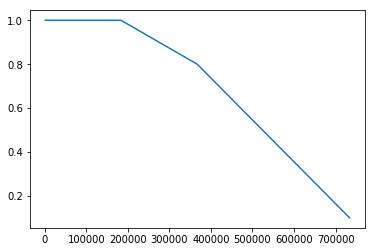

In [46]:
print precision
print recall
import matplotlib.pyplot as plt

plt.plot(lambas,precision)
plt.savefig('1sigma_Precision.png')
plt.clf()
plt.plot(lambas,recall)
plt.savefig('1sigma_Recall.png')


In [40]:
np.asarray([10]*10)


array([10, 10, 10, 10, 10, 10, 10, 10, 10, 10])